# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [88]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
import statistics as stats

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']"
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duvall']"
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron Eckhart']"
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L. Jackson']"
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri Garr']"
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Mary Steenburgen']"
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Boyd']"
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Craig T. Nelson']"


In [89]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
#df['title_length'] = df['title'].apply(len)
#df
df['title_length'] = df['title'].str.len()
df

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton']",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duvall']",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron Eckhart']",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L. Jackson']",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri Garr']",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Mary Steenburgen']",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Boyd']",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Craig T. Nelson']",11


In [90]:
mean = df['title_length'].mean()
mean

np.float64(15.481103166496425)

In [91]:
median = df['title_length'].median()
median

np.float64(14.0)

In [92]:
mode = df['title_length'].mode()
mode

0    12
Name: title_length, dtype: int64

In [93]:
range = df['title_length'].max() - df['title_length'].min()
range

np.int64(67)

In [94]:
variance = df['title_length'].var()
variance

np.float64(72.1067488840288)

In [95]:
std = df['title_length'].std()
std

np.float64(8.491569282766807)

In [96]:
skewness = df['title_length'].skew()
skewness

np.float64(1.5252523464631278)

In [97]:
kurt = df['title_length'].kurt()
kurt

np.float64(3.8122887061291544)

In [ ]:
largest = df['title_length'].max()
largest_title = df.loc[df['title_length'] == largest, 'title']
largest_title

48    Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Name: title, dtype: object

In [99]:
shortest = df['title_length'].min()
shortest_title = df.loc[df['title_length'] == shortest, 'title']
shortest_title

63    M
Name: title, dtype: object

In [100]:
metrics = {}
metrics['mean'] = mean
metrics['mode'] = float(mode[0])
metrics


{'mean': np.float64(15.481103166496425), 'mode': 12.0}

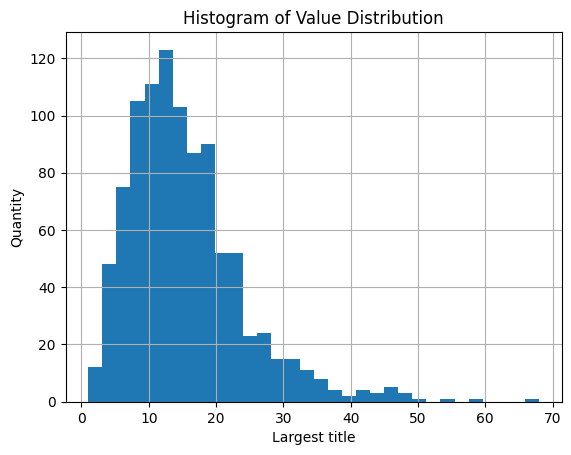

In [101]:
df['title_length'].hist(bins='sqrt')
plt.title('Histogram of Value Distribution')
plt.xlabel('Largest title')
plt.ylabel('Quantity')
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [109]:
list_values = df['title_length'].head(5)
list_values.tolist()

[24, 13, 22, 15, 12]

In [110]:
media = sum(list_values) / len(list_values)
media

17.2

In [112]:
# Calcula las diferencias al cuadrado con respecto a la media

difference = 0
for values in list_values:
    difference += (values - media)**2
difference  

118.80000000000001

In [116]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

variance = difference / (len(list_values)-1)
variance

29.700000000000003

In [119]:
# Raíz cuadrada

square_root = np.sqrt(variance)
float(square_root)

5.449770637375485